In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Testing Accuracy: 0.9932
Precision: 0.9200
Recall: 0.9583
F1 Score: 0.9388
AUC-ROC: 0.9768


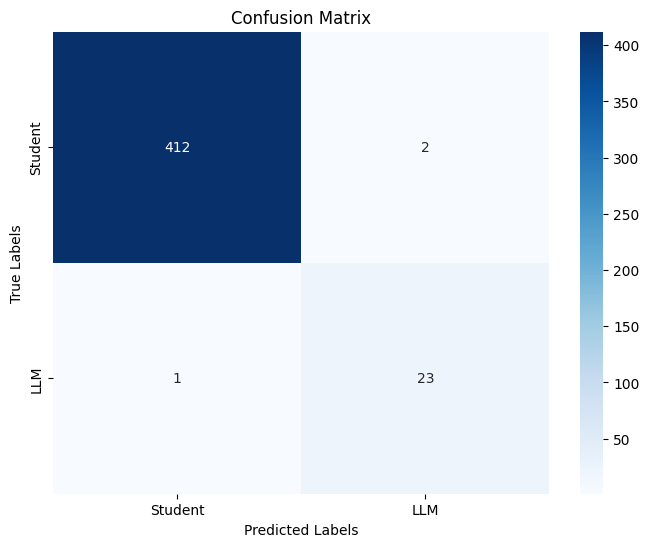

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dat = pd.read_excel('/content/drive/MyDrive/Neural Net and Deep Learning Files/train_essays.xlsx')
dat = dat.iloc[0:1460]  # Select all samples

# Split the data into training and testing sets (70-30 split)
train_data, test_data, train_labels, test_labels = train_test_split(
    dat['text'], dat['generated'], random_state=42, test_size=0.3
)

# Preprocess the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size
train_features = tfidf_vectorizer.fit_transform(train_data)
test_features = tfidf_vectorizer.transform(test_data)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(train_features, train_labels)

# Make predictions on the test set
predictions = model.predict(test_features)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
cm = confusion_matrix(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)
roc_auc = roc_auc_score(test_labels, predictions)

# Calculate metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
roc_auc = roc_auc_score(test_labels, predictions)

# Print metrics
print(f'Testing Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {roc_auc:.4f}')

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Student', 'LLM'], yticklabels=['Student', 'LLM'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
